<a href="https://colab.research.google.com/github/Data-finest/Habibty/blob/main/Analyst_Insight_Brief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

In [ ]:
#Mount file from google drive 
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Dataset of BGLi
data = pd.read_csv("/content/sample_data/Analyst Insight Presentation.csv")
data

,PAGE_TITLE,MEMBER_STATUS,COUNTRY,REFERRER,DEVICE_CATEGORY,USERS,PAGE_VIEWS,SESSIONS,DWELL_TIME,YEARMONTH
0,Who Are The Famous Women From History Who Chan...,Member,United Kingdom,Search,mobile,6,8,6,18.950000,202106
1,What Is Former Prime Minister Margaret Thatche...,Member,United Kingdom,Search,desktop,1,2,1,0.650000,202106
2,"History Articles About Winston Churchill, Brit...",Member,United Kingdom,Other,desktop,1,1,1,0.416667,202106
3,Napoleon's Height: How Tall Was Napoleon Bonap...,Member,United States,Other,desktop,2,2,2,2.133333,202106
4,Why Did The Allies Call Germans 'Huns' During ...,Anonymous,United Kingdom,Social,mobile,1,1,1,0.083333,202106
...,...,...,...,...,...,...,...,...,...,...
109084,When Did Christianity First Arrive In Britain?...,Anonymous,United Kingdom,Direct,mobile,5,5,5,1.550000,202106
109085,The Black Death: Key Facts About The Bubonic P...,Anonymous,United Kingdom,Adestra,mobile,28,39,34,76.950000,202106
109086,The Black Death: Key Facts About The Bubonic P...,Member,United Kingdom,Adestra,mobile,10,17,14,48.600000,202106
109087,Israel & Palestine: A History Of Conflict In 8...,Anonymous,ROW,Direct,mobile,117,216,187,303.083333,202106


In [ ]:
data.shape
data.info

<bound method DataFrame.info of                                                PAGE_TITLE MEMBER_STATUS  \
0       Who Are The Famous Women From History Who Chan...        Member   
1       What Is Former Prime Minister Margaret Thatche...        Member   
2       History Articles About Winston Churchill, Brit...        Member   
3       Napoleon's Height: How Tall Was Napoleon Bonap...        Member   
4       Why Did The Allies Call Germans 'Huns' During ...     Anonymous   
...                                                   ...           ...   
109084  When Did Christianity First Arrive In Britain?...     Anonymous   
109085  The Black Death: Key Facts About The Bubonic P...     Anonymous   
109086  The Black Death: Key Facts About The Bubonic P...        Member   
109087  Israel & Palestine: A History Of Conflict In 8...     Anonymous   
109088  Dictators Explained: The Malevolent Careers of...     Anonymous   

               COUNTRY REFERRER DEVICE_CATEGORY  USERS  PAGE_VIEWS 

In [ ]:
data.describe

<bound method NDFrame.describe of                                                PAGE_TITLE MEMBER_STATUS  \
0       Who Are The Famous Women From History Who Chan...        Member   
1       What Is Former Prime Minister Margaret Thatche...        Member   
2       History Articles About Winston Churchill, Brit...        Member   
3       Napoleon's Height: How Tall Was Napoleon Bonap...        Member   
4       Why Did The Allies Call Germans 'Huns' During ...     Anonymous   
...                                                   ...           ...   
109084  When Did Christianity First Arrive In Britain?...     Anonymous   
109085  The Black Death: Key Facts About The Bubonic P...     Anonymous   
109086  The Black Death: Key Facts About The Bubonic P...        Member   
109087  Israel & Palestine: A History Of Conflict In 8...     Anonymous   
109088  Dictators Explained: The Malevolent Careers of...     Anonymous   

               COUNTRY REFERRER DEVICE_CATEGORY  USERS  PAGE_VIEW

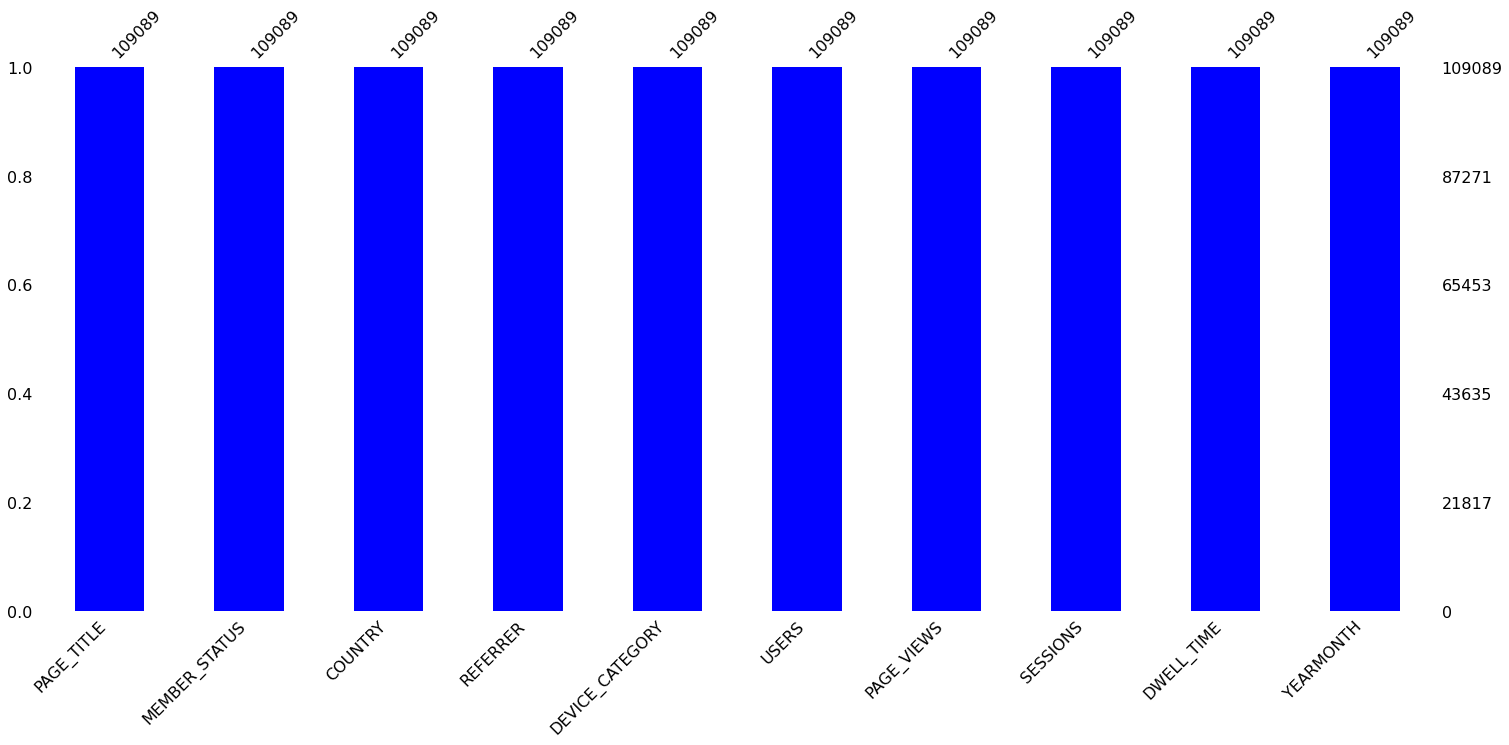

In [ ]:
# finding out if there are any null values or not
null = msno.bar(data,color='blue')



> The chart shows that in the dataset, Page_Title is the only column with null values

 

In [ ]:
#filling the page_Title column with most frequent Title in the dataset
x = data["PAGE_TITLE"].mode()[0]

data["PAGE_TITLE"].fillna(x, inplace = True)

In [ ]:
#checking null values
data.isnull().sum()
# data.isnull().values.any()

PAGE_TITLE         0
MEMBER_STATUS      0
COUNTRY            0
REFERRER           0
DEVICE_CATEGORY    0
USERS              0
PAGE_VIEWS         0
SESSIONS           0
DWELL_TIME         0
YEARMONTH          0
dtype: int64

In [ ]:
data.nunique()

PAGE_TITLE         8200
MEMBER_STATUS         4
COUNTRY               3
REFERRER              6
DEVICE_CATEGORY       3
USERS               875
PAGE_VIEWS         1030
SESSIONS            917
DWELL_TIME         7928
YEARMONTH             1
dtype: int64

In [ ]:
data["PAGE_TITLE"].value_counts   

<bound method IndexOpsMixin.value_counts of 0         Who Are The Famous Women From History Who Chan...
1         What Is Former Prime Minister Margaret Thatche...
2         History Articles About Winston Churchill, Brit...
3         Napoleon's Height: How Tall Was Napoleon Bonap...
4         Why Did The Allies Call Germans 'Huns' During ...
                                ...                        
109084    When Did Christianity First Arrive In Britain?...
109085    The Black Death: Key Facts About The Bubonic P...
109086    The Black Death: Key Facts About The Bubonic P...
109087    Israel & Palestine: A History Of Conflict In 8...
109088    Dictators Explained: The Malevolent Careers of...
Name: PAGE_TITLE, Length: 109089, dtype: object>

In [ ]:
data["COUNTRY"].value_counts   

<bound method IndexOpsMixin.value_counts of 0         United Kingdom
1         United Kingdom
2         United Kingdom
3          United States
4         United Kingdom
               ...      
109084    United Kingdom
109085    United Kingdom
109086    United Kingdom
109087               ROW
109088               ROW
Name: COUNTRY, Length: 109089, dtype: object>

In [ ]:
#dropping the YEARMONTH column since it has not impact in the dataset
data.drop(['YEARMONTH'],axis=1,inplace=True)


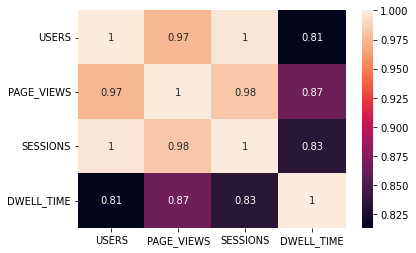

In [ ]:
#correlation plot
correlation = data.corr()
sns.heatmap(correlation,xticklabels= correlation.columns, yticklabels=correlation.columns, annot =True)
# sns.pairplot(data)



> The correlation plot shows the relationship between the columns in the dataset,where Page_Views and Session has the highest correlation in the dataset(0.98), followed by User against Page_Views(0.97), also the Page_Views against Dwell_Time shows a strong correlation(0.87), then the least correlation happened with the Dwell_Time against Users (0.81). 


In [ ]:
data

,PAGE_TITLE,MEMBER_STATUS,COUNTRY,REFERRER,DEVICE_CATEGORY,USERS,PAGE_VIEWS,SESSIONS,DWELL_TIME
0,Who Are The Famous Women From History Who Chan...,Member,United Kingdom,Search,mobile,6,8,6,18.950000
1,What Is Former Prime Minister Margaret Thatche...,Member,United Kingdom,Search,desktop,1,2,1,0.650000
2,"History Articles About Winston Churchill, Brit...",Member,United Kingdom,Other,desktop,1,1,1,0.416667
3,Napoleon's Height: How Tall Was Napoleon Bonap...,Member,United States,Other,desktop,2,2,2,2.133333
4,Why Did The Allies Call Germans 'Huns' During ...,Anonymous,United Kingdom,Social,mobile,1,1,1,0.083333
...,...,...,...,...,...,...,...,...,...
109084,When Did Christianity First Arrive In Britain?...,Anonymous,United Kingdom,Direct,mobile,5,5,5,1.550000
109085,The Black Death: Key Facts About The Bubonic P...,Anonymous,United Kingdom,Adestra,mobile,28,39,34,76.950000
109086,The Black Death: Key Facts About The Bubonic P...,Member,United Kingdom,Adestra,mobile,10,17,14,48.600000
109087,Israel & Palestine: A History Of Conflict In 8...,Anonymous,ROW,Direct,mobile,117,216,187,303.083333


In [ ]:
Dwell = data.groupby('MEMBER_STATUS').DWELL_TIME.mean()
Dwell

MEMBER_STATUS
Anonymous     21.385617
Member         9.163233
Non-member     0.566667
Subscriber     3.530868
Name: DWELL_TIME, dtype: float64

In [ ]:
Dwell = data.groupby('MEMBER_STATUS').DWELL_TIME.mean()
mem_status = pd.DataFrame(Dwell).reset_index()
mem_status

,MEMBER_STATUS,DWELL_TIME
0,Anonymous,21.385617
1,Member,9.163233
2,Non-member,0.566667
3,Subscriber,3.530868



>  This table shows the average Time an individual visit the comapnies website to read content. It can be seen that, the Anonymous users spend more time (21.385617) reading a content compared to any other user. It is followed by Member users with (9.163233) and subscribers (3.530868). 




In [ ]:
Mem = pd.DataFrame(data.MEMBER_STATUS.value_counts()).reset_index()
Mem.rename(columns = {'index': 'MEMBER_STATUS', 'MEMBER_STATUS': 'counts'}, inplace = True)
Mem

,MEMBER_STATUS,counts
0,Anonymous,82956
1,Member,24805
2,Subscriber,1325
3,Non-member,3




> The number of Members who view the organisations website were the Anonymous users happen to be the most users with (82956), followed by Members (24805), Subscriber (1325) and lastly, Non-member (3).



In [ ]:
Mem_merger = Mem.merge(mem_status)
Mem_merger['conversion_Rate']= round(Mem_merger.counts / Mem_merger.DWELL_TIME, 3)
Mem_merger

,MEMBER_STATUS,counts,DWELL_TIME,conversion_Rate
0,Anonymous,82956,21.385617,3879.056
1,Member,24805,9.163233,2707.014
2,Subscriber,1325,3.530868,375.262
3,Non-member,3,0.566667,5.294




```
# This is formatted as code
```



> This table shows that Anonymous users spend the most time on reading a content 
\


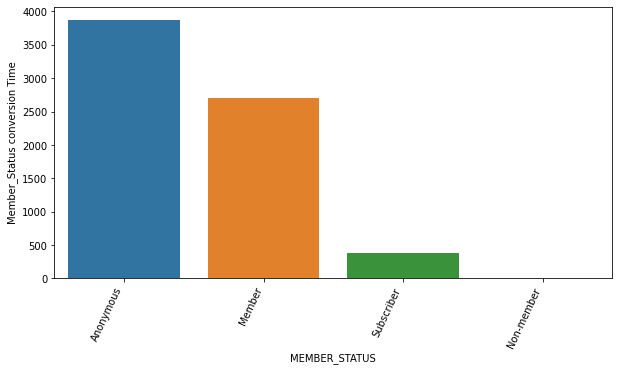

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Mem_merger,
    x='MEMBER_STATUS',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Member_Status conversion Time")

In [ ]:
# Session and Member_status

mem_session = data.groupby('MEMBER_STATUS').SESSIONS.mean()
mem_session = pd.DataFrame(mem_session).reset_index()
mem_session

,MEMBER_STATUS,SESSIONS
0,Anonymous,21.750133
1,Member,4.515501
2,Non-member,1.666667
3,Subscriber,1.978868


In [ ]:
session = pd.DataFrame(data.MEMBER_STATUS.value_counts()).reset_index()
session.rename(columns = {'index': 'MEMBER_STATUS', 'MEMBER_STATUS': 'counts'}, inplace = True)
session


,MEMBER_STATUS,counts
0,Anonymous,82956
1,Member,24805
2,Subscriber,1325
3,Non-member,3


In [ ]:
Mem_ses = Mem.merge(mem_session)
Mem_ses['conversion_Rate']= round(Mem_ses.counts / Mem_ses.SESSIONS, 3)
Mem_ses

,MEMBER_STATUS,counts,SESSIONS,conversion_Rate
0,Anonymous,82956,21.750133,3814.046
1,Member,24805,4.515501,5493.300
2,Subscriber,1325,1.978868,669.575
3,Non-member,3,1.666667,1.800


In [ ]:
data.REFERRER.value_counts()

Search     44062
Direct     20923
Other      19675
Adestra    16193
Social      7995
AMP          241
Name: REFERRER, dtype: int64

In [ ]:
Ref = pd.DataFrame(data.REFERRER.value_counts()).reset_index()
Ref.rename(columns = {'index': 'REFERRER', 'REFERRER': 'counts'}, inplace = True)

Ref

,REFERRER,counts
0,Search,44062
1,Direct,20923
2,Other,19675
3,Adestra,16193
4,Social,7995
5,AMP,241


In [ ]:
vw = data.groupby('REFERRER').DWELL_TIME.mean()
vw_Ref = pd.DataFrame(vw).reset_index()#.rename(columns = {'index': 'Channel_1'}, inplace = True)
vw_Ref

,REFERRER,DWELL_TIME
0,AMP,2.449585
1,Adestra,18.935676
2,Direct,9.594655
3,Other,10.573377
4,Search,27.536013
5,Social,9.599954


In [ ]:
conversion_Rate = round(44062 / 27.536013, 2) 
conversion_Rate

1600.16

In [ ]:
Ref_merger = Ref.merge(vw_Ref)
Ref_merger['conversion_Rate']= round(Ref_merger.counts / Ref_merger.DWELL_TIME, 3)
Ref_merger

,REFERRER,counts,DWELL_TIME,conversion_Rate
0,Search,44062,27.536013,1600.159
1,Direct,20923,9.594655,2180.693
2,Other,19675,10.573377,1860.806
3,Adestra,16193,18.935676,855.158
4,Social,7995,9.599954,832.816
5,AMP,241,2.449585,98.384


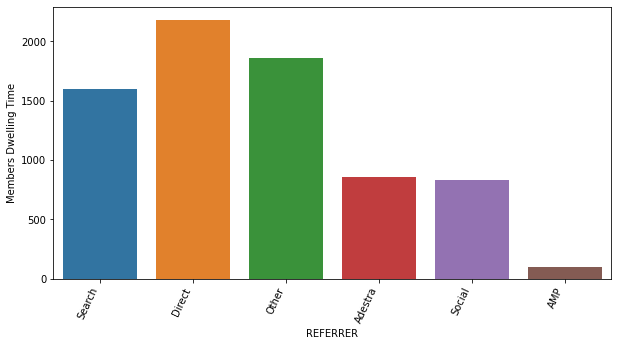

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= Ref_merger,
    x='REFERRER',
    y='conversion_Rate'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Referrer conversion Time")

In [ ]:
plt.bar(x= 'DWELL_TIME', height= 'REFERRER', data=Ref_merger)
plt.show()


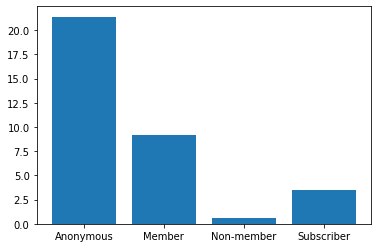

In [ ]:
r= pd.DataFrame(view).reset_index()
# sns.countplot(r['DWELL_TIME'])
plt.bar(x= 'MEMBER_STATUS', height= 'DWELL_TIME', data=r)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data= r,
    x='MEMBER_STATUS',
    y='DWELL_TIME'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Members Dwelling Time")

In [ ]:
# #q1 histogram using px 
# fig = px.histogram(data, x = 'USERS', y='PAGE_VIEWS')
# fig.show()

In [ ]:
data.nunique()

PAGE_TITLE         8200
MEMBER_STATUS         4
COUNTRY               3
REFERRER              6
DEVICE_CATEGORY       3
USERS               875
PAGE_VIEWS         1030
SESSIONS            917
DWELL_TIME         7928
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109089 entries, 0 to 109088
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PAGE_TITLE       109089 non-null  object 
 1   MEMBER_STATUS    109089 non-null  object 
 2   COUNTRY          109089 non-null  object 
 3   REFERRER         109089 non-null  object 
 4   DEVICE_CATEGORY  109089 non-null  object 
 5   USERS            109089 non-null  int64  
 6   PAGE_VIEWS       109089 non-null  int64  
 7   SESSIONS         109089 non-null  int64  
 8   DWELL_TIME       109089 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 7.5+ MB


In [ ]:
# plt.figure(figsize = (10,10))
# plt.pie (data.sum(), labels=data.columns)
# plt.title('Total views', fontsize=25)
# plt.legend(loc=2)
# plt.show()

In [ ]:
# data['DWELL_TIME'].count()

data['SESSIONS'].mean()

In [ ]:
#Transforming choosen columns
from numpy.ma.core import count
# pf=data.groupby('COUNTRY')['USERS'].agg(['mean','min'])
pf=data.groupby('COUNTRY')['REFERRER'].agg(['mean']).reset_index(drop=False)
pf['mean']=pf.groupby('COUNTRY')['REFERRER'].reset_index(drop=False)
# pf['perc'] = (pf['count'] / data['USERS'].count()).round(4)
# media_status=pf.sort_values('count',ascending=False)
pf['mean'] 

In [ ]:
# media_status
pf

,COUNTRY,mean,median,min,max
0,ROW,16.848428,2.0,1,12374
1,United Kingdom,12.477119,2.0,1,8097
2,United States,18.709236,2.0,1,18254


In [ ]:
pf.plot.barh(x='COUNTRY',y='count',legend=False)
plt.title('Country View Distribution',fontsize=14)
plt.xlabel('count')

In [ ]:
# processing some strategic columns for analysis
df=data.groupby('MEMBER_STATUS')['USERS'].sum().reset_index(name='count')
country_df = data[data['DWELL_TIME'] == 1]
Views_grouped = country_df.groupby('MEMBER_STATUS')['USERS'].count().reset_index(name='count')
#spliting of the dataset 
viewers_status=df.sort_values('count',ascending=False)
viewers_status['count_p'] = Views_grouped['count']

In [ ]:
viewers_status['percentage_purchased'] = viewers_status['count_p'] / viewers_status['count']
viewers_status

,MEMBER_STATUS,count,count_p,percentage_purchased
0,Anonymous,1640663,245.0,0.000149
1,Member,92724,96.0,0.001035
3,Subscriber,1985,NaN,NaN
2,Non-member,3,1.0,0.333333


In [ ]:
pd.isna(viewers_status).any()

MEMBER_STATUS           False
count                   False
count_p                  True
percentage_purchased     True
dtype: bool

In [ ]:
# Viewers_status
# Views_grouped
Viewers_status['count_p']
# data.head(5)

0    32025
1     8120
3      274
2        1
Name: count_p, dtype: int64

In [ ]:

mm = data.groupby(['COUNTRY', 'MEMBER_STATUS'])['USERS'].count().reset_index(name='count')
mm['perc'] = (mm['count'] / data['USERS'].count()).round(4)
mm

,COUNTRY,MEMBER_STATUS,count,perc
0,ROW,Anonymous,31774,0.2913
1,ROW,Member,9899,0.0907
2,ROW,Subscriber,261,0.0024
3,United Kingdom,Anonymous,26764,0.2453
4,United Kingdom,Member,9165,0.0840
5,United Kingdom,Non-member,3,0.0000
6,United Kingdom,Subscriber,583,0.0053
7,United States,Anonymous,24418,0.2238
8,United States,Member,5741,0.0526
9,United States,Subscriber,481,0.0044


In [ ]:
mm['perc']

In [ ]:
# processing some strategic columns for analysis
df=data.groupby('COUNTRY')['PAGE_VIEWS'].count().reset_index(name='count')
view_df = data[data['DEVICE_CATEGORY'] == 1]
df_grouped = view_df.groupby('COUNTRY')['PAGE_VIEWS'].count().reset_index(name='count')
#spliting of the dataset 
view_status=df.sort_values('count',ascending=False)
view_status['count_p'] = df_grouped['count']


In [ ]:
# employement_status['count_p'].isnull().sum()
# purchased_df_grouped
df_grouped
# purchased_df
# view_status
data[data['REFERRER'] == 1]

In [ ]:
view_status['percentage_purchased'] = view_status['count_p'] / view_status['count']
view_status
